In [1]:
#importing all libraries
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib notebook
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x , ty, vy, ax, colors=['b']):
    ax.plot(x , ty , 'b' , label='Train Loss')
    ax.plot(x , vy , 'g' , label='Validation Loss')
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# loading the datasets with spliting across Train and Test 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("The Number of Training Images",X_train.shape[0], " and each image size (%d)(%d)"%(X_train.shape[1], X_train.shape[2]))
print("The Number of Tetsing Images", X_test.shape[0] , " and each image size (%d)(%d)" %(X_test.shape[1], X_test.shape[2]))

The Number of Training Images 60000  and each image size (28)(28)
The Number of Tetsing Images 10000  and each image size (28)(28)


In [0]:
# Converting this 2D vector into 1D vector of size 1*784
X_Train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])

In [7]:
X_Test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
print("Training Image Size : ", X_Train.shape[1])
print("Test Image Size : ", X_Test.shape[1])

Training Image Size :  784
Test Image Size :  784


In [8]:
print(" Before Normalization ")
print(X_Train[100],Y_train[100])

 Before Normalization 
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   2  18  46 136 136 244 255 241 103   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253 238 218
 204  35   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 131 253 253 253 253 237

In [9]:
# Normalization of the Train and Test Dataset
X_Train = X_Train/255
X_Test = X_Test/255

print(" After Normalization ")
print(X_Train[100],Y_train[100])

 After Normalization 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         

In [10]:
# One Hot Encoding the Class Variables
# Number of classes = 10 as there are 10 digits {0,1,2...,9}

print(" Before Encoding :", Y_train[100])
Y_Train = np_utils.to_categorical(Y_train,10)
Y_Test = np_utils.to_categorical(Y_test, 10)
print(" After Encoding : ", Y_Train[100])

 Before Encoding : 5
 After Encoding :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### **Model 0 : Softmax Classifier**

In [0]:
# Parameters Initialization
input_param = X_Train.shape[1]
output_param = Y_Train.shape[1]
batch_size = 128
n_epoch = 10

In [0]:
model_softmax = Sequential()
model_softmax.add(Dense(input_dim=input_param, output_dim = output_param, activation = 'softmax')) # Defining the Model Architecture
model_softmax.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy']) # Configuring the Learning Process
history_softmax = model_softmax.fit(X_Train, Y_Train, batch_size = batch_size, epochs = n_epoch, verbose = 1, validation_data = (X_Test,Y_Test)) # Training Process

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="softmax", units=10)`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.6813 - acc: 0.8289 - val_loss: 0.3871 - val_acc: 0.9001
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.3640 - acc: 0.9017 - val_loss: 0.3207 - val_acc: 0.9128
Epoch 3/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.3201 - acc: 0.9118 - val_loss: 0.2961 - val_acc: 0.9171
Epoch 4/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.3002 - acc: 0.9168 - val_loss: 0.2851 - val_acc: 0.9207
Epoch 5/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.2882 - acc: 0.9195 - val_loss: 0.2790 - val_acc: 0.9225
Epoch 6/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.2801 - acc: 0.9215 - val_loss: 0.2750 - val_acc: 0.9233
Epoch 7/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.2743 - acc: 0.9239 - val_loss: 0.2714 - val_acc

In [0]:
score_softmax = model_softmax.evaluate(X_Test,Y_Test,verbose = 1)
print("SOFTMAX VALIDATION LOSS : ", score_softmax[0])
print("SOFTMAX VALIDATION ACCURACY : ", score_softmax[1])

10000/10000 [==============================] - 0s 23us/step
SOFTMAX VALIDATION LOSS :  0.2655204429358244
SOFTMAX VALIDATION ACCURACY :  0.9263


In [0]:
print(history_softmax.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


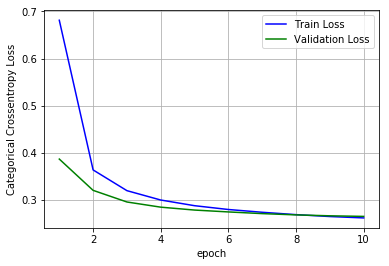

In [0]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,n_epoch+1))
vy = history_softmax.history['val_loss']
ty = history_softmax.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

### MODEL 1 : 2 LAYER ARCHITECHTURE 



In [0]:
batch_size = 128
nEpoch = 20

#### 1.1 : 2 Layer Model without BN and Dropout

#### A : 2 Layer Architechture with Sigmoid + Adam

In [13]:
model_layer2 = Sequential()
model_layer2.add(Dense(512,activation='sigmoid',kernel_initializer='glorot_uniform',input_shape=(input_param,)))
model_layer2.add(Dense(128,activation='sigmoid',kernel_initializer='glorot_uniform'))
model_layer2.add(Dense(output_param,activation='softmax'))
model_layer2.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_layer2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_model_layer2 = model_layer2.fit(X_Train,Y_Train,batch_size=batch_size,epochs=nEpoch,verbose=1,validation_data=(X_Test,Y_Test))

model2_score = model_layer2.evaluate(X_Test,Y_Test,verbose=1)
print("Test Accuracy : ", model2_score[1])
print("Test Score : ", model2_score[0])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 8s 130us/step - loss: 0.5221 - acc: 0.8646 - val_loss: 0.2505 - val_acc: 0.9261
Epoch 2/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.2210 - acc: 0.9351 - val_loss: 0.1824 - val_acc: 0.9451
Epoch 3/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.1633 - acc: 0.9516 - val_loss: 0.1440 - val_acc: 0.9568
Epoch 4/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.1272 - acc: 0.9627 - val_loss: 0.1271 - val_acc: 0.9604
Epoch 5/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.1001 - acc: 0.9709 - val_loss: 0.0993 - val_acc: 0.9685
Epoch 6/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0802 - acc: 0.9769 - val_loss: 0.0884 - val_acc: 0.9718
Epoch 7/20
60000/6

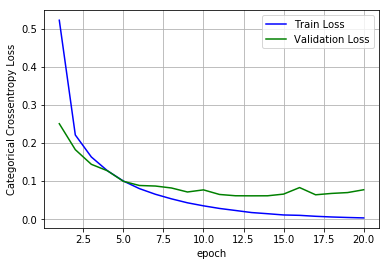

In [15]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,nEpoch+1))
vy = history_model_layer2.history['val_loss']
ty = history_model_layer2.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

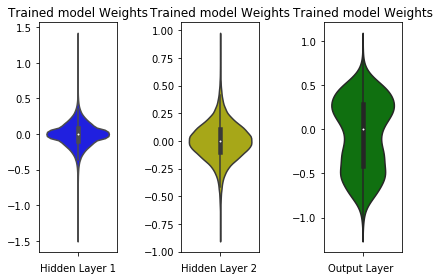

In [19]:
weights_layer2_adam = model_layer2.get_weights()

h1_weights = weights_layer2_adam[0].flatten().reshape(-1,1)
h2_weights = weights_layer2_adam[2].flatten().reshape(-1,1)
output_weights = weights_layer2_adam[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
plt.tight_layout()
ax = sns.violinplot(y=h1_weights,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_weights, color='y')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=output_weights,color='g')
plt.xlabel('Output Layer ')
plt.tight_layout()
plt.show()

#### B : 2 Layer Architechture with Sigmoid + SGD

In [0]:
model_layer2.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history_model_layer = model_layer2.fit(X_Train,Y_Train,batch_size=batch_size,epochs=nEpoch,verbose=1,validation_data=(X_Test,Y_Test))

model_score = model_layer2.evaluate(X_Test,Y_Test,verbose=1)
print("Test Accuracy : ", model_score[1])
print("Test Score : ", model_score[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 175us/step - loss: 1.3978e-04 - acc: 1.0000 - val_loss: 0.0781 - val_acc: 0.9840
Epoch 2/20
60000/60000 [==============================] - 7s 118us/step - loss: 1.3954e-04 - acc: 1.0000 - val_loss: 0.0781 - val_acc: 0.9840
Epoch 3/20
60000/60000 [==============================] - 7s 122us/step - loss: 1.3931e-04 - acc: 1.0000 - val_loss: 0.0781 - val_acc: 0.9840
Epoch 4/20
60000/60000 [==============================] - 7s 120us/step - loss: 1.3909e-04 - acc: 1.0000 - val_loss: 0.0781 - val_acc: 0.9840
Epoch 5/20
60000/60000 [==============================] - 7s 109us/step - loss: 1.3887e-04 - acc: 1.0000 - val_loss: 0.0781 - val_acc: 0.9840
Epoch 6/20
60000/60000 [==============================] - 7s 115us/step - loss: 1.3866e-04 - acc: 1.0000 - val_loss: 0.0781 - val_acc: 0.9840
Epoch 7/20
60000/60000 [==============================] - 6s 108us/step - loss: 1.3846e-04 - acc:

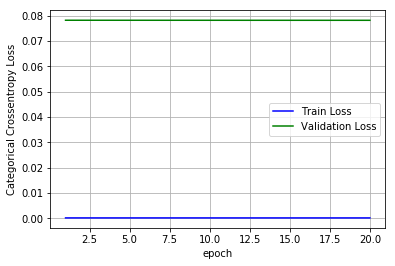

In [0]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,nEpoch+1))
vy = history_model_layer.history['val_loss']
ty = history_model_layer.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

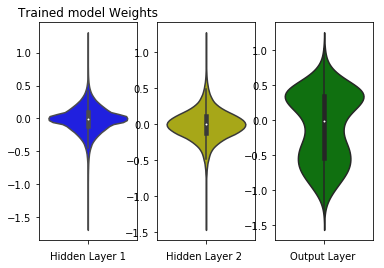

In [0]:
weights_layer2_sgd = model_layer2.get_weights()

h1_weights = weights_layer2_sgd[0].flatten().reshape(-1,1)
h2_weights = weights_layer2_sgd[2].flatten().reshape(-1,1)
output_weights = weights_layer2_sgd[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_weights,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_weights, color='y')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=output_weights,color='g')
plt.xlabel('Output Layer ')
plt.show()

#### C : 2 Layer Architecture with Relu + Adam

In [0]:
model_layer2_relu = Sequential()
model_layer2_relu.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_param,)))
model_layer2_relu.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_layer2_relu.add(Dense(output_param,activation='softmax'))
model_layer2_relu.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_layer2_relu.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_model_layer2_relu = model_layer2_relu.fit(X_Train,Y_Train,batch_size=batch_size,epochs=nEpoch,verbose=1,validation_data=(X_Test,Y_Test))

model2_score_relu = model_layer2_relu.evaluate(X_Test,Y_Test,verbose=1)
print("Test Accuracy : ", model2_score_relu[1])
print("Test Score : ", model2_score_relu[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.2277 - acc: 0.9330 - val_loss: 0.1057 - val_acc: 0.9687
Epoch 2/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0854 - acc: 0.9744 - val_loss: 0.0812 - val_acc: 0.9739
Epoch 3/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0533 - acc: 0.9838 - val_loss: 0.0772 - val_acc: 0.9761
Epoch 4/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0372 - acc: 0.9884 - val_loss: 0.0730 - val_acc: 0.9773
Epoch 5/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0283 - acc: 0.9910 - val_loss: 0.0768 - val_acc: 0.9765
Epoch 6/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0195 - acc: 0.9940 - val_loss: 0.0733 - val_acc: 0.9798
Epoch 7/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0172 - acc: 0.9942 - val_loss: 0.0683 -

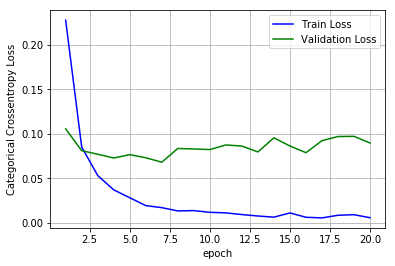

In [0]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,nEpoch+1))
vy = history_model_layer2_relu.history['val_loss']
ty = history_model_layer2_relu.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

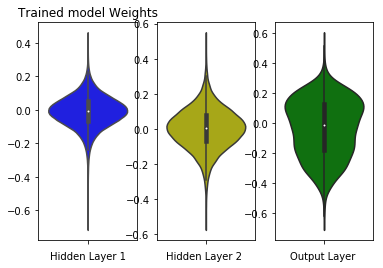

In [0]:
weights_layer2_relu = model_layer2_relu.get_weights()

h1_weights = weights_layer2_relu[0].flatten().reshape(-1,1)
h2_weights = weights_layer2_relu[2].flatten().reshape(-1,1)
output_weights = weights_layer2_relu[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_weights,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_weights, color='y')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=output_weights,color='g')
plt.xlabel('Output Layer ')
plt.show()

#### 1.2 : 2 Layer Model with Batch Normalization

In [0]:
model_layer2_bn = Sequential()
model_layer2_bn.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_param,)))
model_layer2_bn.add(BatchNormalization())
model_layer2_bn.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_layer2_bn.add(BatchNormalization())
model_layer2_bn.add(Dense(output_param,activation='softmax'))

model_layer2_bn.summary()

model_layer2_bn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_model_layer2_bn = model_layer2_bn.fit(X_Train,Y_Train,batch_size=batch_size,epochs=nEpoch,verbose=1,validation_data=(X_Test,Y_Test))

score_model_layer2_bn = model_layer2_bn.evaluate(X_Test,Y_Test,verbose=1)
print("Test Accuracy : ",score_model_layer2_bn[1])
print("Test Score : ",score_model_layer2_bn[0])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dense_28 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1

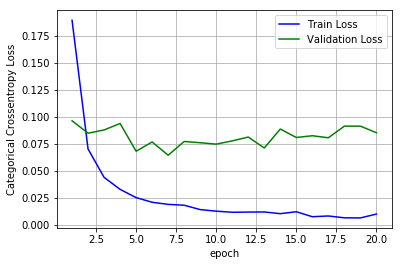

In [0]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,nEpoch+1))
vy = history_model_layer2_bn.history['val_loss']
ty = history_model_layer2_bn.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

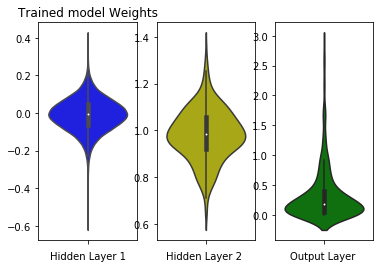

In [0]:
weights_layer2_bn = model_layer2_bn.get_weights()

h1_weights = weights_layer2_bn[0].flatten().reshape(-1,1)
h2_weights = weights_layer2_bn[2].flatten().reshape(-1,1)
output_weights = weights_layer2_bn[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_weights,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_weights, color='y')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=output_weights,color='g')
plt.xlabel('Output Layer ')
plt.show()

#### 1.3 : 2 Layer Model with Dropout

In [0]:
model_layer2_drop = Sequential()
model_layer2_drop.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_param,)))
model_layer2_drop.add(Dropout(0.5))

model_layer2_drop.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_layer2_drop.add(Dropout(0.5))
model_layer2_drop.add(Dense(output_param,activation='softmax'))

model_layer2_drop.summary()

model_layer2_drop.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_model_layer2_drop = model_layer2_drop.fit(X_Train,Y_Train,batch_size=batch_size,epochs=nEpoch,verbose=1,validation_data=(X_Test,Y_Test))

score_model_layer2_drop = model_layer2_drop.evaluate(X_Test,Y_Test,verbose=1)
print("Test Accuracy : ",score_model_layer2_drop[1])
print("Test Score : ",score_model_layer2_drop[0])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
________________________________________________________________

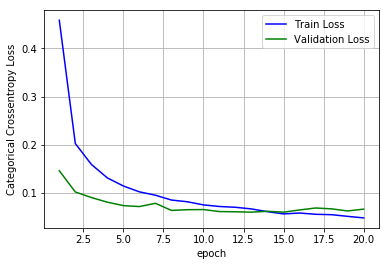

In [0]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,nEpoch+1))
vy = history_model_layer2_drop.history['val_loss']
ty = history_model_layer2_drop.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

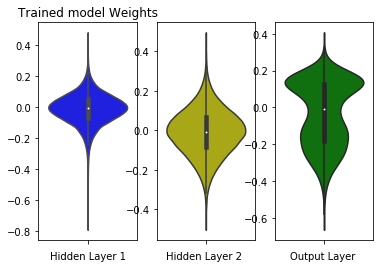

In [0]:
weights_layer2_drop = model_layer2_drop.get_weights()

h1_weights = weights_layer2_drop[0].flatten().reshape(-1,1)
h2_weights = weights_layer2_drop[2].flatten().reshape(-1,1)
output_weights = weights_layer2_drop[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_weights,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_weights, color='y')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=output_weights,color='g')
plt.xlabel('Output Layer ')
plt.show()

#### 1.4 : 2 Layer Model with both batch Normalization and Dropout

In [0]:
model_layer2_bn_drop = Sequential()
model_layer2_bn_drop.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_param,)))
model_layer2_bn_drop.add(BatchNormalization())
model_layer2_bn_drop.add(Dropout(0.5))

model_layer2_bn_drop.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_layer2_bn_drop.add(BatchNormalization())
model_layer2_bn_drop.add(Dropout(0.5))
model_layer2_bn_drop.add(Dense(output_param,activation='softmax'))

model_layer2_bn_drop.summary()

model_layer2_bn_drop.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_model_layer2_bn_drop = model_layer2_bn_drop.fit(X_Train,Y_Train,batch_size=batch_size,epochs=nEpoch,verbose=1,validation_data=(X_Test,Y_Test))

score_model_layer2_bn_drop = model_layer2_bn_drop.evaluate(X_Test,Y_Test,verbose=1)
print("Test Accuracy : ",score_model_layer2_bn_drop[1])
print("Test Score : ",score_model_layer2_bn_drop[0])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)              

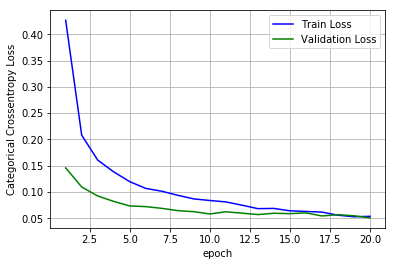

In [0]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,nEpoch+1))
vy = history_model_layer2_bn_drop.history['val_loss']
ty = history_model_layer2_bn_drop.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

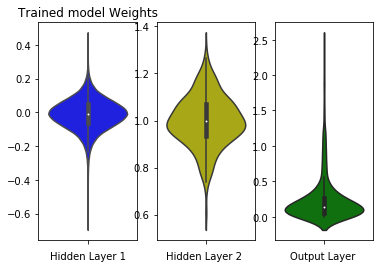

In [0]:
weights_layer2_bn_drop = model_layer2_bn_drop.get_weights()

h1_weights = weights_layer2_bn_drop[0].flatten().reshape(-1,1)
h2_weights = weights_layer2_bn_drop[2].flatten().reshape(-1,1)
output_weights = weights_layer2_bn_drop[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_weights,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_weights, color='y')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=output_weights,color='g')
plt.xlabel('Output Layer ')
plt.show()

In [0]:
!pip -vvv install prettytable

Created temporary directory: /tmp/pip-ephem-wheel-cache-onyysd4t
Created temporary directory: /tmp/pip-req-tracker-5a1s9ggi
Created requirements tracker '/tmp/pip-req-tracker-5a1s9ggi'
Created temporary directory: /tmp/pip-install-06nidhnl
Cleaning up...
Removed build tracker '/tmp/pip-req-tracker-5a1s9ggi'


### 2 Layer Model Summary :

In [0]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model Structure","Accuracy", "Validation Loss"]

x.add_row(["Model 1 w/o BN + Dropout (Relu+Adam)", 0.9831, 0.0898])
x.add_row(["Model 1 w/o BN + Dropout (Sigmoid+SGD)", 0.9840, 0.0781])
x.add_row(["Model 1 w/o BN + Dropout (Sigmoid+Adam)", 0.9840, 0.0781])
x.add_row(["Model 2 with BN ", 0.9790, 0.0852])
x.add_row(["Model 3 With Dropout ", 0.9839, 0.0669])
x.add_row(["Model 4 With Both BN + Dropout ", 0.9847, 0.0505])

print(x)

+-----------------------------------------+----------+-----------------+
|             Model Structure             | Accuracy | Validation Loss |
+-----------------------------------------+----------+-----------------+
|   Model 1 w/o BN + Dropout (Relu+Adam)  |  0.9831  |      0.0898     |
|  Model 1 w/o BN + Dropout (Sigmoid+SGD) |  0.984   |      0.0781     |
| Model 1 w/o BN + Dropout (Sigmoid+Adam) |  0.984   |      0.0781     |
|             Model 2 with BN             |  0.979   |      0.0852     |
|          Model 3 With Dropout           |  0.9839  |      0.0669     |
|     Model 4 With Both BN + Dropout      |  0.9847  |      0.0505     |
+-----------------------------------------+----------+-----------------+


### Model 2 : 3 LAYER ARCHITECTURE

#### 2.1 : 3 Layer Model Without BN and Dropout

In [20]:
model_layer3_relu = Sequential()

model_layer3_relu.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_param,)))
model_layer3_relu.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model_layer3_relu.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_layer3_relu.add(Dense(output_param,activation='softmax'))

model_layer3_relu.summary()

model_layer3_relu.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_model_layer3_relu = model_layer3_relu.fit(X_Train,Y_Train,batch_size=128,epochs=20,verbose=1,validation_data=(X_Test,Y_Test))

score_model_layer3_relu = model_layer3_relu.evaluate(X_Test,Y_Test,verbose=1)
print("Test Score : ",score_model_layer3_relu[0])
print("Test Accuracy : ",score_model_layer3_relu[1])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.2233 - acc: 0.9339 - val_loss: 0.1128 - val_acc: 0.9652
Epoch 2/20
60000/60000 [==============================] -

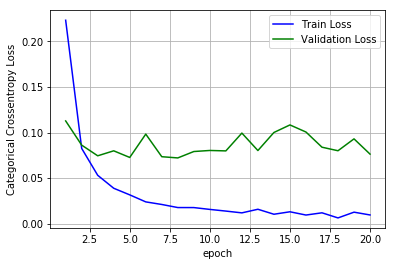

In [21]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,nEpoch+1))
vy = history_model_layer3_relu.history['val_loss']
ty = history_model_layer3_relu.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

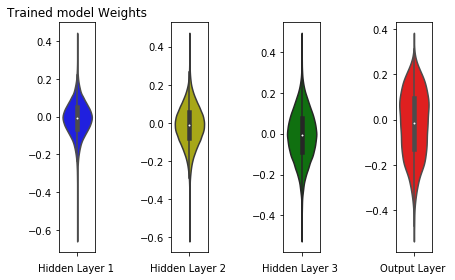

In [27]:
weights_layer3_relu = model_layer3_relu.get_weights()

h1_weights = weights_layer3_relu[0].flatten().reshape(-1,1)
h2_weights = weights_layer3_relu[2].flatten().reshape(-1,1)
h3_weights = weights_layer3_relu[4].flatten().reshape(-1,1)
output_weights = weights_layer3_relu[6].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_weights,color='b')
plt.xlabel('Hidden Layer 1 ')

plt.subplot(1, 4, 2)
ax = sns.violinplot(y=h2_weights, color='y')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
ax = sns.violinplot(y=h3_weights,color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
ax = sns.violinplot(y=output_weights,color='r')
plt.xlabel('Output Layer ')
plt.tight_layout()
plt.show()

#### 2.2 : 3 Layer Model with BatchNormalization

In [28]:
model_layer3_bn = Sequential()

model_layer3_bn.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_param,)))
model_layer3_bn.add(BatchNormalization())
model_layer3_bn.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model_layer3_bn.add(BatchNormalization())
model_layer3_bn.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_layer3_bn.add(BatchNormalization())
model_layer3_bn.add(Dense(output_param,activation='softmax'))

model_layer3_bn.summary()

model_layer3_bn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_model_layer3_bn = model_layer3_bn.fit(X_Train,Y_Train,batch_size=128,epochs=20,verbose=1,validation_data=(X_Test,Y_Test))

score_model_layer3_bn = model_layer3_bn.evaluate(X_Test,Y_Test,verbose=1)
print("Test Score : ",score_model_layer3_bn[0])
print("Test Accuracy : ",score_model_layer3_bn[1])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dense_11 (Dense)             (None, 10)              

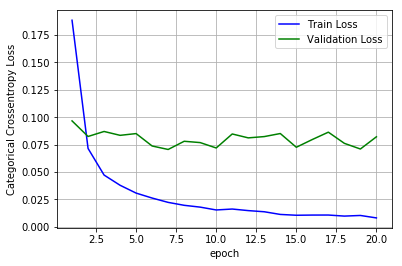

In [29]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,nEpoch+1))
vy = history_model_layer3_bn.history['val_loss']
ty = history_model_layer3_bn.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

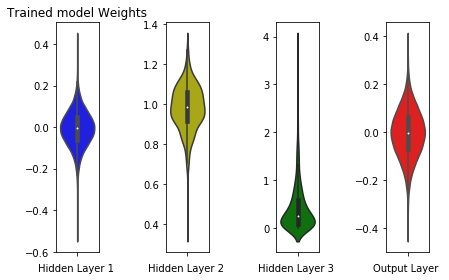

In [30]:
weights_layer3_bn = model_layer3_bn.get_weights()

h1_weights = weights_layer3_bn[0].flatten().reshape(-1,1)
h2_weights = weights_layer3_bn[2].flatten().reshape(-1,1)
h3_weights = weights_layer3_bn[4].flatten().reshape(-1,1)
output_weights = weights_layer3_bn[6].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_weights,color='b')
plt.xlabel('Hidden Layer 1 ')

plt.subplot(1, 4, 2)
ax = sns.violinplot(y=h2_weights, color='y')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
ax = sns.violinplot(y=h3_weights,color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
ax = sns.violinplot(y=output_weights,color='r')
plt.xlabel('Output Layer ')
plt.tight_layout()
plt.show()

#### 2.3 : 3 Layer Model with Dropout

In [31]:
model_layer3_drop = Sequential()

model_layer3_drop.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_param,)))
model_layer3_drop.add(Dropout(0.5))
model_layer3_drop.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model_layer3_drop.add(Dropout(0.5))
model_layer3_drop.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_layer3_drop.add(Dropout(0.5))
model_layer3_drop.add(Dense(output_param,activation='softmax'))

model_layer3_drop.summary()

model_layer3_drop.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_model_layer3_drop = model_layer3_drop.fit(X_Train,Y_Train,batch_size=128,epochs=20,verbose=1,validation_data=(X_Test,Y_Test))

score_model_layer3_drop = model_layer3_drop.evaluate(X_Test,Y_Test,verbose=1)
print("Test Score : ",score_model_layer3_drop[0])
print("Test Accuracy : ",score_model_layer3_drop[1])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_____

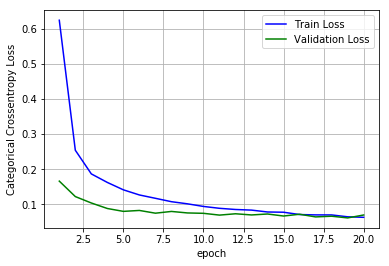

In [32]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,nEpoch+1))
vy = history_model_layer3_drop.history['val_loss']
ty = history_model_layer3_drop.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

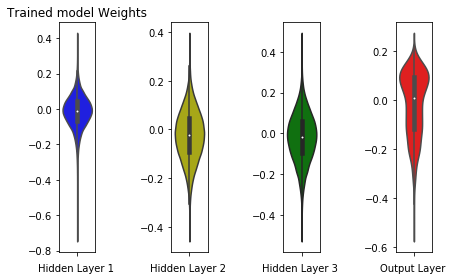

In [33]:
weights_layer3_drop = model_layer3_drop.get_weights()

h1_weights = weights_layer3_drop[0].flatten().reshape(-1,1)
h2_weights = weights_layer3_drop[2].flatten().reshape(-1,1)
h3_weights = weights_layer3_drop[4].flatten().reshape(-1,1)
output_weights = weights_layer3_drop[6].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_weights,color='b')
plt.xlabel('Hidden Layer 1 ')

plt.subplot(1, 4, 2)
ax = sns.violinplot(y=h2_weights, color='y')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
ax = sns.violinplot(y=h3_weights,color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
ax = sns.violinplot(y=output_weights,color='r')
plt.xlabel('Output Layer ')
plt.tight_layout()
plt.show()

#### 2.4 : 3 Layer Model with both Batch Normalization and Dropout

In [34]:
model_layer3_bn_drop = Sequential()

model_layer3_bn_drop.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_param,)))
model_layer3_bn_drop.add(BatchNormalization())
model_layer3_bn_drop.add(Dropout(0.5))
model_layer3_bn_drop.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model_layer3_bn_drop.add(BatchNormalization())
model_layer3_bn_drop.add(Dropout(0.5))
model_layer3_bn_drop.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_layer3_bn_drop.add(BatchNormalization())
model_layer3_bn_drop.add(Dropout(0.5))
model_layer3_bn_drop.add(Dense(output_param,activation='softmax'))

model_layer3_bn_drop.summary()

model_layer3_bn_drop.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_model_layer3_bn_drop = model_layer3_bn_drop.fit(X_Train,Y_Train,batch_size=128,epochs=20,verbose=1,validation_data=(X_Test,Y_Test))

score_model_layer3_bn_drop = model_layer3_bn_drop.evaluate(X_Test,Y_Test,verbose=1)
print("Test Score : ",score_model_layer3_bn_drop[0])
print("Test Accuracy : ",score_model_layer3_bn_drop[1])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)              

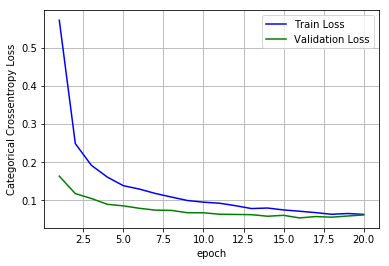

In [35]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,nEpoch+1))
vy = history_model_layer3_bn_drop.history['val_loss']
ty = history_model_layer3_bn_drop.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

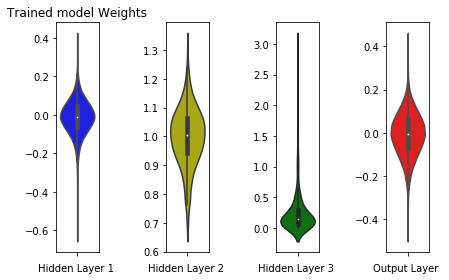

In [36]:
weights_layer3_bn_drop = model_layer3_bn_drop.get_weights()

h1_weights = weights_layer3_bn_drop[0].flatten().reshape(-1,1)
h2_weights = weights_layer3_bn_drop[2].flatten().reshape(-1,1)
h3_weights = weights_layer3_bn_drop[4].flatten().reshape(-1,1)
output_weights = weights_layer3_bn_drop[6].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_weights,color='b')
plt.xlabel('Hidden Layer 1 ')

plt.subplot(1, 4, 2)
ax = sns.violinplot(y=h2_weights, color='y')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
ax = sns.violinplot(y=h3_weights,color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
ax = sns.violinplot(y=output_weights,color='r')
plt.xlabel('Output Layer ')
plt.tight_layout()
plt.show()

### 3 Layer Model Summary 

In [0]:
x = PrettyTable()

x.field_names = ["Model Structure","Accuracy", "Validation Loss"]

x.add_row(["Model 1 w/o BN + Dropout ", 0.9821, 0.0938])
x.add_row(["Model 2 with BN ", 0.9777, 0.0929])
x.add_row(["Model 3 With Dropout ", 0.9839, 0.0671])
x.add_row(["Model 4 With Both BN + Dropout ", 0.9829, 0.0615])

print(x)

+---------------------------------+----------+-----------------+
|         Model Structure         | Accuracy | Validation Loss |
+---------------------------------+----------+-----------------+
|    Model 1 w/o BN + Dropout     |  0.9821  |      0.0938     |
|         Model 2 with BN         |  0.9777  |      0.0929     |
|      Model 3 With Dropout       |  0.9839  |      0.0671     |
| Model 4 With Both BN + Dropout  |  0.9829  |      0.0615     |
+---------------------------------+----------+-----------------+


### MODEL 3 : 5 LAYER ARCHITECTURE

#### 3.1 : 5 Layer Model without BN and Dropout

In [37]:
model_layer5_relu = Sequential()

model_layer5_relu.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_param,)))
model_layer5_relu.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model_layer5_relu.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_layer5_relu.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_layer5_relu.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
model_layer5_relu.add(Dense(output_param,activation='softmax'))

model_layer5_relu.summary()

model_layer5_relu.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_model_layer5_relu = model_layer5_relu.fit(X_Train,Y_Train,batch_size=128,epochs=20,verbose=1,validation_data=(X_Test,Y_Test))

score_model_layer5_relu = model_layer5_relu.evaluate(X_Test,Y_Test,verbose=1)
print("Test Score : ",score_model_layer5_relu[0])
print("Test Accuracy : ",score_model_layer5_relu[1])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
________________________________________________

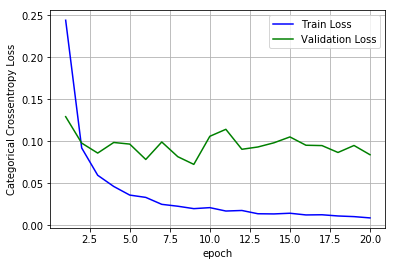

In [38]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,nEpoch+1))
vy = history_model_layer5_relu.history['val_loss']
ty = history_model_layer5_relu.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


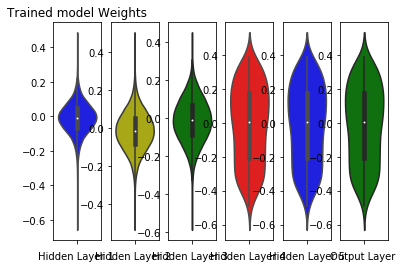

In [39]:
weights_layer5_relu = model_layer5_relu.get_weights()

h1_weights = weights_layer5_relu[0].flatten().reshape(-1,1)
h2_weights = weights_layer5_relu[2].flatten().reshape(-1,1)
h3_weights = weights_layer5_relu[4].flatten().reshape(-1,1)
h4_weights = weights_layer5_relu[6].flatten().reshape(-1,1)
h5_weights = weights_layer5_relu[8].flatten().reshape(-1,1)
output_weights = weights_layer5_relu[10].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_weights,color='b')
plt.xlabel('Hidden Layer 1 ')

plt.subplot(1, 6, 2)
ax = sns.violinplot(y=h2_weights, color='y')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
ax = sns.violinplot(y=h3_weights,color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
ax = sns.violinplot(y=output_weights,color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
ax = sns.violinplot(y=output_weights,color='b')
plt.xlabel('Hidden Layer 5')

plt.subplot(1, 6, 6)
ax = sns.violinplot(y=output_weights,color='g')
plt.xlabel('Output Layer ')
plt.tight_layout()
plt.show()

#### 3.2 : 5 Layer Model with Batch Normalization

In [0]:
model_layer5_bn = Sequential()

model_layer5_bn.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_param,)))
model_layer5_bn.add(BatchNormalization())
model_layer5_bn.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model_layer5_bn.add(BatchNormalization())
model_layer5_bn.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_layer5_bn.add(BatchNormalization())
model_layer5_bn.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_layer5_bn.add(BatchNormalization())
model_layer5_bn.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
model_layer5_bn.add(BatchNormalization())
model_layer5_bn.add(Dense(output_param,activation='softmax'))

model_layer5_bn.summary()

model_layer5_bn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_model_layer5_bn = model_layer5_bn.fit(X_Train,Y_Train,batch_size=128,epochs=20,verbose=1,validation_data=(X_Test,Y_Test))

score_model_layer5_bn = model_layer5_bn.evaluate(X_Test,Y_Test,verbose=1)
print("Test Score : ",score_model_layer5_bn[0])
print("Test Accuracy : ",score_model_layer5_bn[1])

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)               2048      
_________________________________________________________________
dense_59 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_22 (Batc (None, 256)               1024      
_________________________________________________________________
dense_60 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_23 (Batc (None, 128)               512       
_________________________________________________________________
dense_61 (Dense)             (None, 64)              

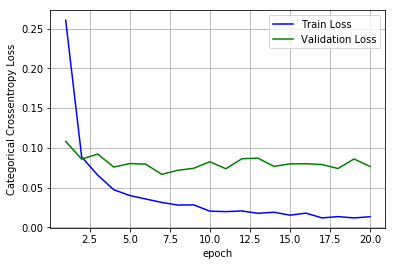

In [0]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,nEpoch+1))
vy = history_model_layer5_bn.history['val_loss']
ty = history_model_layer5_bn.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

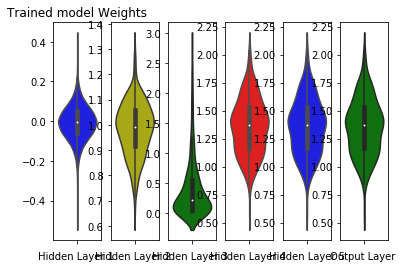

In [0]:
weights_layer5_bn = model_layer5_bn.get_weights()

h1_weights = weights_layer5_bn[0].flatten().reshape(-1,1)
h2_weights = weights_layer5_bn[2].flatten().reshape(-1,1)
h3_weights = weights_layer5_bn[4].flatten().reshape(-1,1)
h4_weights = weights_layer5_bn[6].flatten().reshape(-1,1)
h5_weights = weights_layer5_bn[8].flatten().reshape(-1,1)
output_weights = weights_layer5_bn[10].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_weights,color='b')
plt.xlabel('Hidden Layer 1 ')

plt.subplot(1, 6, 2)
ax = sns.violinplot(y=h2_weights, color='y')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
ax = sns.violinplot(y=h3_weights,color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
ax = sns.violinplot(y=output_weights,color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
ax = sns.violinplot(y=output_weights,color='b')
plt.xlabel('Hidden Layer 5')

plt.subplot(1, 6, 6)
ax = sns.violinplot(y=output_weights,color='g')
plt.xlabel('Output Layer ')
plt.show()

#### 3.3 : 5 Layer Model with Dropout

In [0]:
model_layer5_drop = Sequential()

model_layer5_drop.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_param,)))
model_layer5_drop.add(Dropout(0.5))
model_layer5_drop.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model_layer5_drop.add(Dropout(0.5))
model_layer5_drop.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_layer5_drop.add(Dropout(0.5))
model_layer5_drop.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_layer5_drop.add(Dropout(0.5))
model_layer5_drop.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
model_layer5_drop.add(Dropout(0.5))
model_layer5_drop.add(Dense(output_param,activation='softmax'))

model_layer5_drop.summary()

model_layer5_drop.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_model_layer5_drop = model_layer5_drop.fit(X_Train,Y_Train,batch_size=128,epochs=20,verbose=1,validation_data=(X_Test,Y_Test))

score_model_layer5_drop = model_layer5_drop.evaluate(X_Test,Y_Test,verbose=1)
print("Test Score : ",score_model_layer5_drop[0])
print("Test Accuracy : ",score_model_layer5_drop[1])

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 64)              

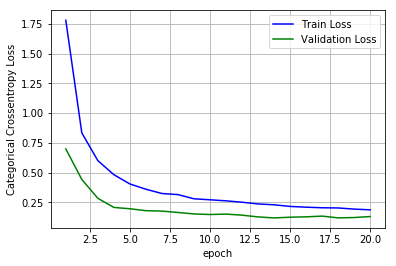

In [0]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,nEpoch+1))
vy = history_model_layer5_drop.history['val_loss']
ty = history_model_layer5_drop.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

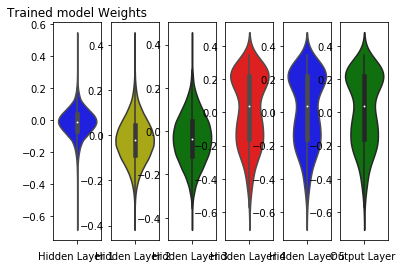

In [0]:
weights_layer5_drop = model_layer5_drop.get_weights()

h1_weights = weights_layer5_drop[0].flatten().reshape(-1,1)
h2_weights = weights_layer5_drop[2].flatten().reshape(-1,1)
h3_weights = weights_layer5_drop[4].flatten().reshape(-1,1)
h4_weights = weights_layer5_drop[6].flatten().reshape(-1,1)
h5_weights = weights_layer5_drop[8].flatten().reshape(-1,1)
output_weights = weights_layer5_drop[10].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_weights,color='b')
plt.xlabel('Hidden Layer 1 ')

plt.subplot(1, 6, 2)
ax = sns.violinplot(y=h2_weights, color='y')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
ax = sns.violinplot(y=h3_weights,color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
ax = sns.violinplot(y=output_weights,color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
ax = sns.violinplot(y=output_weights,color='b')
plt.xlabel('Hidden Layer 5')

plt.subplot(1, 6, 6)
ax = sns.violinplot(y=output_weights,color='g')
plt.xlabel('Output Layer ')
plt.show()

#### 3.4 : 5 Layer Model With Both Batch Normalization and Dropout

In [0]:
model_layer5_bn_drop = Sequential()

model_layer5_bn_drop.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_param,)))
model_layer5_bn_drop.add(BatchNormalization())
model_layer5_bn_drop.add(Dropout(0.5))
model_layer5_bn_drop.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model_layer5_bn_drop.add(BatchNormalization())
model_layer5_bn_drop.add(Dropout(0.5))
model_layer5_bn_drop.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_layer5_bn_drop.add(BatchNormalization())
model_layer5_bn_drop.add(Dropout(0.5))
model_layer5_bn_drop.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_layer5_bn_drop.add(BatchNormalization())
model_layer5_bn_drop.add(Dropout(0.5))
model_layer5_bn_drop.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
model_layer5_bn_drop.add(BatchNormalization())
model_layer5_bn_drop.add(Dropout(0.5))
model_layer5_bn_drop.add(Dense(output_param,activation='softmax'))

model_layer5_bn_drop.summary()

model_layer5_bn_drop.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_model_layer5_bn_drop = model_layer5_bn_drop.fit(X_Train,Y_Train,batch_size=128,epochs=20,verbose=1,validation_data=(X_Test,Y_Test))

score_model_layer5_bn_drop = model_layer5_bn_drop.evaluate(X_Test,Y_Test,verbose=1)
print("Test Score : ",score_model_layer5_bn_drop[0])
print("Test Accuracy : ",score_model_layer5_bn_drop[1])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_27 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_28 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 128)             

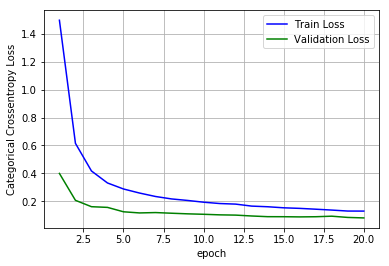

In [0]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,nEpoch+1))
vy = history_model_layer5_bn_drop.history['val_loss']
ty = history_model_layer5_bn_drop.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

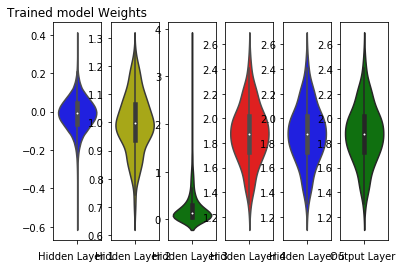

In [0]:
weights_layer5_relu = model_layer5_bn_drop.get_weights()

h1_weights = weights_layer5_relu[0].flatten().reshape(-1,1)
h2_weights = weights_layer5_relu[2].flatten().reshape(-1,1)
h3_weights = weights_layer5_relu[4].flatten().reshape(-1,1)
h4_weights = weights_layer5_relu[6].flatten().reshape(-1,1)
h5_weights = weights_layer5_relu[8].flatten().reshape(-1,1)
output_weights = weights_layer5_relu[10].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_weights,color='b')
plt.xlabel('Hidden Layer 1 ')

plt.subplot(1, 6, 2)
ax = sns.violinplot(y=h2_weights, color='y')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
ax = sns.violinplot(y=h3_weights,color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
ax = sns.violinplot(y=output_weights,color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
ax = sns.violinplot(y=output_weights,color='b')
plt.xlabel('Hidden Layer 5')

plt.subplot(1, 6, 6)
ax = sns.violinplot(y=output_weights,color='g')
plt.xlabel('Output Layer ')
plt.show()

### 5 layer Model Summary

In [0]:
x = PrettyTable()

x.field_names = ["Model Structure","Accuracy", "Validation Loss"]

x.add_row(["Model 1 w/o BN + Dropout ", 0.9814, 0.0907])
x.add_row(["Model 2 with BN ", 0.9815, 0.0764])
x.add_row(["Model 3 With Dropout ", 0.9731, 0.1314])
x.add_row(["Model 4 With Both BN + Dropout ", 0.9821, 0.0804])

print(x)

+---------------------------------+----------+-----------------+
|         Model Structure         | Accuracy | Validation Loss |
+---------------------------------+----------+-----------------+
|    Model 1 w/o BN + Dropout     |  0.9814  |      0.0907     |
|         Model 2 with BN         |  0.9815  |      0.0764     |
|      Model 3 With Dropout       |  0.9731  |      0.1314     |
| Model 4 With Both BN + Dropout  |  0.9821  |      0.0804     |
+---------------------------------+----------+-----------------+
